In [ ]:
# Is it possible to see any clusters?

In [2]:
# load pickle file with numpy
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [19]:
# cusines
path = '../data/processed/data.json'
df = pd.read_json(path)
df.head()


,id,cuisine,ingredients,representation_idx
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes...",0
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g...",1
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g...",2
3,22213,indian,"[water, vegetable oil, wheat, salt]",3
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe...",4


In [20]:
df['cuisine'].value_counts()

italian         7838
mexican         6438
southern_us     4320
indian          3003
chinese         2673
french          2646
cajun_creole    1546
thai            1539
japanese        1423
greek           1175
spanish          989
korean           830
vietnamese       825
moroccan         821
british          804
filipino         755
irish            667
jamaican         526
russian          489
brazilian        467
Name: cuisine, dtype: int64

In [21]:
# map cusines to numbers
df['cuisine_id'] = df['cuisine'].map({'italian': 0, 'mexican': 1, 'southern_us': 2, 'indian': 3, 'chinese': 4, 'french': 5, 'cajun_creole': 6, 'thai': 7, 'japanese': 8, 'greek': 9, 'spanish': 10, 'korean': 11, 'vietnamese': 12, 'moroccan': 13, 'british': 14, 'filipino': 15, 'irish': 16, 'jamaican': 17, 'russian': 18, 'brazilian': 19})

In [10]:
# load the data/processed/onehot-embedding.pkl
onehot_data = np.load('../data/processed/onehot-embedding.pkl', allow_pickle=True).toarray()
onehot_data.shape

(39774, 3384)

In [12]:
# apply pca to reduce the dimensionality
from sklearn.decomposition import PCA, TruncatedSVD
pca = TruncatedSVD(n_components=2)
pca.fit(onehot_data)
modified_onehot = pca.transform(onehot_data)
print(modified_onehot.shape)


(39774, 2)


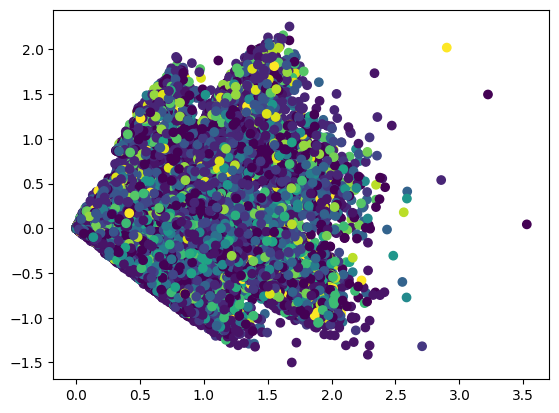

In [22]:
plt.scatter(modified_onehot[:,0], modified_onehot[:,1], c=df['cuisine_id'])

In [23]:
# t-sne to see if there are any clusters
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=1)
tsne_results = tsne.fit_transform(onehot_data)

/Users/viktordue/Documents/uni/AASAMC/.venv/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/viktordue/Documents/uni/AASAMC/.venv/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 39774 samples in 0.081s...
[t-SNE] Computed neighbors for 39774 samples in 222.533s...
[t-SNE] Computed conditional probabilities for sample 1000 / 39774
[t-SNE] Computed conditional probabilities for sample 2000 / 39774
[t-SNE] Computed conditional probabilities for sample 3000 / 39774
[t-SNE] Computed conditional probabilities for sample 4000 / 39774
[t-SNE] Computed conditional probabilities for sample 5000 / 39774
[t-SNE] Computed conditional probabilities for sample 6000 / 39774
[t-SNE] Computed conditional probabilities for sample 7000 / 39774
[t-SNE] Computed conditional probabilities for sample 8000 / 39774
[t-SNE] Computed conditional probabilities for sample 9000 / 39774
[t-SNE] Computed conditional probabilities for sample 10000 / 39774
[t-SNE] Computed conditional probabilities for sample 11000 / 39774
[t-SNE] Computed conditional probabilities for sample 12000 / 39774
[t-SNE] Computed conditional probabilities for 

In [24]:
tsne_results.shape

(39774, 2)

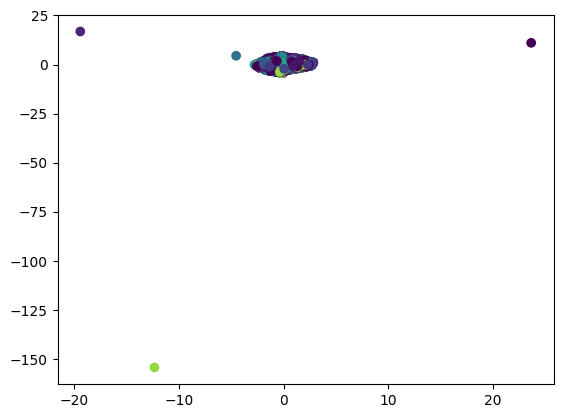

In [25]:
plt.scatter(tsne_results[:,0], tsne_results[:,1], c=df['cuisine_id'])